# Import libraries


In [ ]:
import tensorflow as tf
import os
import cv2
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization as BatchNorm
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download & unzip files

In [ ]:
os.environ["KAGGLE_USERNAME"] = "convexhulltrick"
os.environ["KAGGLE_KEY"] = "..."
!kaggle competitions download -c digit-recognizer


 85% 13.0M/15.3M [00:00<00:00, 54.6MB/s]
100% 15.3M/15.3M [00:00<00:00, 55.2MB/s]


In [ ]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Splitting data into train & val

In [ ]:
data = pd.read_csv('/content/train.csv')
print(data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [ ]:
Y = data.label
X = data.drop('label', axis = 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [ ]:
def toNumpyAndReshape(x, y):
  x = x.to_numpy()
  x = x.reshape(y)

  return x

In [ ]:
X_train = toNumpyAndReshape(X_train, (-1, 28, 28, 1))
X_test = toNumpyAndReshape(X_test, (-1, 28, 28, 1))
Y_train = toNumpyAndReshape(Y_train, (-1, 1))
Y_test = toNumpyAndReshape(Y_test, (-1, 1))

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600, 1)
(8400, 1)


In [ ]:
num_classes = 10
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes)

In [ ]:
IMG_SIZE = 28
num_classes = 10
LR = 0.001
MODEL_NAME = "digits_classifier"

# Building CNN model & run

In [ ]:
def get_model(): 
  model = tf.keras.models.Sequential(name = MODEL_NAME)

  model.add(Conv2D(32, (3, 3), input_shape = (IMG_SIZE, IMG_SIZE, 1), padding = "same", activation = "relu"))
  model.add(Conv2D(32, (3, 3), padding = "same", activation = "relu"))
  model.add(BatchNorm())
  model.add(MaxPooling2D((2, 2), strides = 2))
  model.add(Dropout(0.2))

  model.add(Conv2D(64, (3, 3), padding = "same", activation = "relu"))
  model.add(Conv2D(64, (3, 3), padding = "same", activation = "relu"))
  model.add(BatchNorm())
  model.add(MaxPooling2D((2, 2), strides = 2))
  model.add(Dropout(0.2))

  model.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
  model.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
  model.add(BatchNorm())
  model.add(MaxPooling2D((2, 2), strides = 2))
  model.add(Dropout(0.2))

  model.add(Conv2D(256, (3, 3), padding = "same", activation = "relu"))
  model.add(Conv2D(256, (3, 3), padding = "same", activation = "relu"))
  model.add(BatchNorm())
  model.add(MaxPooling2D((2, 2), strides = 2))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(512, activation = "relu"))
  model.add(Dense(num_classes, activation = "softmax"))

  model.summary()
  return model


In [ ]:
model = get_model()

Model: "digits_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)  

In [ ]:
Adam = tf.keras.optimizers.Adam(learning_rate = LR)
model.compile(loss = "categorical_crossentropy", 
              optimizer = Adam, 
              metrics = ['accuracy'])

In [ ]:
datagen = ImageDataGenerator(rotation_range = 5, 
                             width_shift_range = 0.1,
                             height_shift_range = 0.1, 
                             zoom_range = 0.1)

In [ ]:
EPOCH = 40
history = model.fit(datagen.flow(X_train, Y_train), epochs = EPOCH)

Epoch 1/40
1050/1050 [==============================] - 26s 12ms/step - loss: 0.3328 - accuracy: 0.8955
Epoch 2/40
1050/1050 [==============================] - 13s 12ms/step - loss: 0.1084 - accuracy: 0.9686
Epoch 3/40
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0868 - accuracy: 0.9755
Epoch 4/40
1050/1050 [==============================] - 14s 14ms/step - loss: 0.0720 - accuracy: 0.9792
Epoch 5/40
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0681 - accuracy: 0.9810
Epoch 6/40
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0587 - accuracy: 0.9835
Epoch 7/40
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0562 - accuracy: 0.9848
Epoch 8/40
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0441 - accuracy: 0.9878
Epoch 9/40
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0486 - accuracy: 0.9869
Epoch 10/40
1050/1050 [==============================] - 13s 12m

In [ ]:
model.evaluate(X_test, Y_test)

263/263 [==============================] - 1s 4ms/step - loss: 0.0264 - accuracy: 0.9935


[0.026438478380441666, 0.9934523701667786]

# Evaluating on test set & packaging results into .csv flie

In [ ]:
def readfile(location):
  data = pd.read_csv(location)
  print(data.head())

  return data

In [ ]:
readfile('/content/test.csv')

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data = readfile('/content/test.csv')
X_realtest = test_data

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [ ]:
X_realtest = toNumpyAndReshape(X_realtest, (-1, 28, 28, 1))
print(X_realtest.shape)


(28000, 28, 28, 1)


1


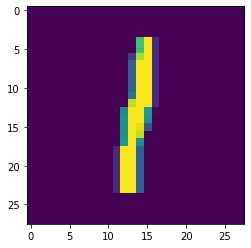

In [ ]:
import random 
import matplotlib.pyplot as plt

TEST_SIZE = 28001
idx = random.randint(1, TEST_SIZE - 1)
img = X_realtest[idx, :].reshape(1, IMG_SIZE, IMG_SIZE, 1)
Y_pred = model.predict(img)
plt.imshow(X_realtest[idx, :].reshape(IMG_SIZE, IMG_SIZE))
print(Y_pred.argmax())

In [ ]:
Y_pred = model.predict(X_realtest)
Y_pred = np.argmax(Y_pred, axis = 1)

In [ ]:
submission = pd.DataFrame()
image_id = [i for i in range(1, TEST_SIZE)]
submission["ImageId"] = image_id
submission["Label"] = Y_pred

submission.to_csv("submission.csv", index = False)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


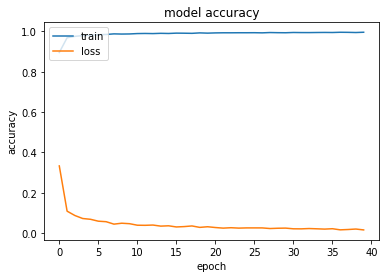

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()